In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 1.Data Import

In [14]:
df = pd.read_csv(r"C:\Users\KaushalDhumal\Downloads\ecommerce_sales_analysis.csv")
df.head()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257


# 2.Data Cleaning
Handling missing and incorrect data

### Check for missing values

In [15]:
df.isnull().sum()

product_id        0
product_name      0
category          0
price             0
review_score      0
review_count      0
sales_month_1     0
sales_month_2     0
sales_month_3     0
sales_month_4     0
sales_month_5     0
sales_month_6     0
sales_month_7     0
sales_month_8     0
sales_month_9     0
sales_month_10    0
sales_month_11    0
sales_month_12    0
dtype: int64

### Check if any duplicate values

In [19]:
duplicates = df.duplicated().sum()
print("Duplicate Records: ",duplicates)

Duplicate Records:  0


### Checking for negative or invalid values in key numerical cols

In [29]:
invalid_prices = (df['price'] < 0).sum()
invalid_review_scores = ((df['review_score'] < 0) | (df['review_score'] > 5)).sum()
invalid_sales = (df.iloc[:, 6:] <0).sum()
print('Invaid prices: ',invalid_prices,'\nInvalid review scores: ',invalid_review_scores, '\nInvlaid sales: ',invalid_sales )

Invaid prices:  0 
Invalid review scores:  0 
Invlaid sales:  sales_month_1     0
sales_month_2     0
sales_month_3     0
sales_month_4     0
sales_month_5     0
sales_month_6     0
sales_month_7     0
sales_month_8     0
sales_month_9     0
sales_month_10    0
sales_month_11    0
sales_month_12    0
dtype: int64


### Checking for Outliers

<Axes: >

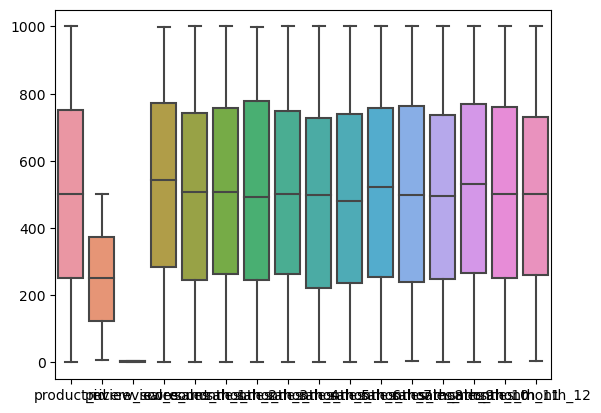

In [17]:
sns.boxplot(data=df)

# 3.Sales & Review Analysis

In [18]:
df.describe()

,product_id,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,247.677130,3.027600,526.506000,498.306000,507.661000,506.739000,503.823000,487.194000,491.653000,507.011000,504.569000,491.934000,514.798000,505.83800,500.386000
std,288.819436,144.607983,1.171243,282.269932,289.941478,285.992689,294.010873,286.645567,287.844324,289.234018,291.047287,289.945691,287.514731,288.710119,288.82451,278.509459
min,1.000000,7.290000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.00000,4.000000
25%,250.750000,121.810000,2.000000,283.750000,245.500000,262.500000,243.750000,261.500000,221.000000,236.000000,254.000000,240.500000,247.250000,267.000000,251.25000,259.000000
50%,500.500000,250.920000,3.100000,543.000000,507.500000,508.000000,493.000000,501.500000,497.000000,479.500000,522.500000,499.500000,495.500000,532.000000,502.00000,500.500000
75%,750.250000,373.435000,4.000000,772.000000,740.750000,756.250000,777.250000,749.500000,727.000000,740.500000,757.250000,762.250000,735.250000,770.250000,761.00000,730.000000
max,1000.000000,499.860000,5.000000,999.000000,1000.000000,1000.000000,999.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000


### Total sales per product category

In [30]:
df['total_sales'] = df.iloc[:, 6:].sum(axis=1)  # Sum sales across all 12 months
category_sales = df.groupby('category')['total_sales'].sum().sort_values(ascending=False)

In [31]:
category_sales

category
Books             938229
Toys              917101
Sports            916371
Electronics       845120
Health            834414
Clothing          826536
Home & Kitchen    742141
Name: total_sales, dtype: int64

In [32]:
df.head()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,total_sales
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,6421
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,6027
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392,5580
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203,5022
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257,6094


### Top 5 Best selling products

In [35]:
top_products = df[['product_name', 'category','total_sales']].sort_values(by='total_sales', ascending = False).head(5)
top_products

,product_name,category,total_sales
223,Product_224,Electronics,9151
285,Product_286,Clothing,8921
733,Product_734,Health,8914
904,Product_905,Sports,8783
179,Product_180,Sports,8775


### Average review scores by Categroy

In [38]:
category_review_scores = df.groupby('category')['review_score'].mean().sort_values(ascending=False)
category_review_scores

category
Electronics       3.143478
Books             3.096753
Sports            3.091503
Home & Kitchen    3.035200
Health            3.005036
Clothing          2.952143
Toys              2.870861
Name: review_score, dtype: float64

# Visualization


### 1.Total Sales per category

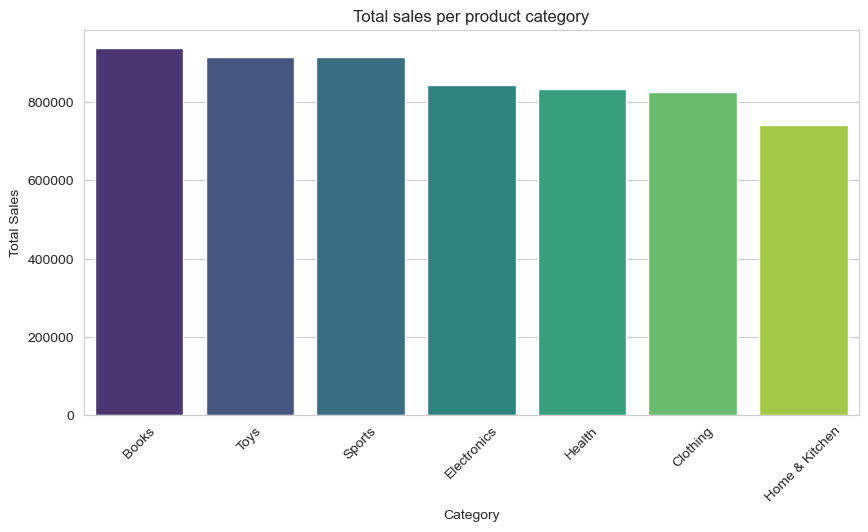

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(x = category_sales.index, y=category_sales.values, palette='viridis')
plt.xticks(rotation=45)      #rotation of x-axis labels to improve readability
plt.title("Total sales per product category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

### 2.Top 5 Best Selling Products

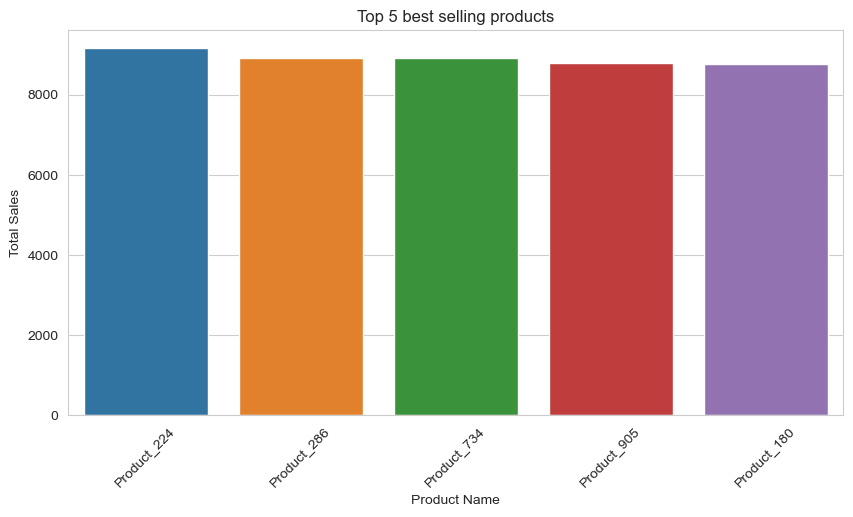

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(x = top_products['product_name'], y = top_products['total_sales'])
plt.xticks(rotation=45)
plt.title("Top 5 best selling products")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.show()

### 3.Average Review Score by Category

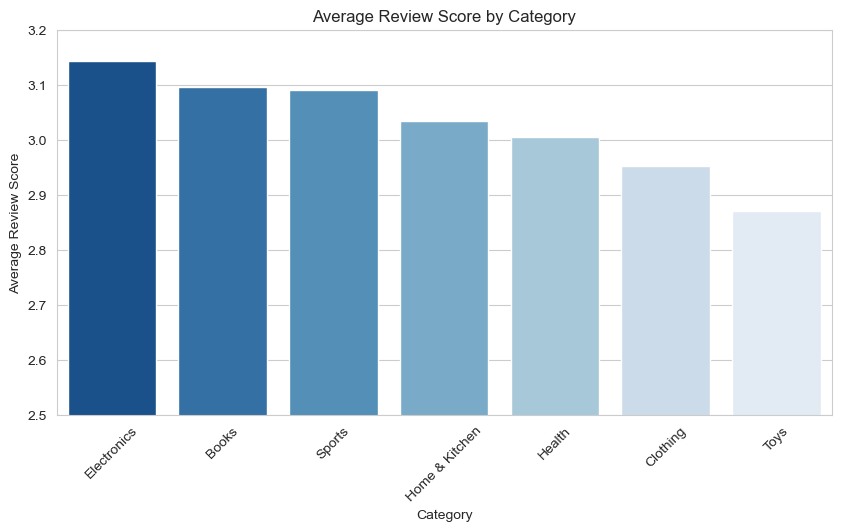

In [50]:
plt.figure(figsize=(10, 5))
sns.barplot(x=category_review_scores.index, y=category_review_scores.values, palette="Blues_r")
plt.xticks(rotation=45)
plt.ylim(2.5, 3.2)  # Setting y-axis limit for better visualization
plt.title("Average Review Score by Category")
plt.xlabel("Category")
plt.ylabel("Average Review Score")
plt.show()

### 4.Price Distribution

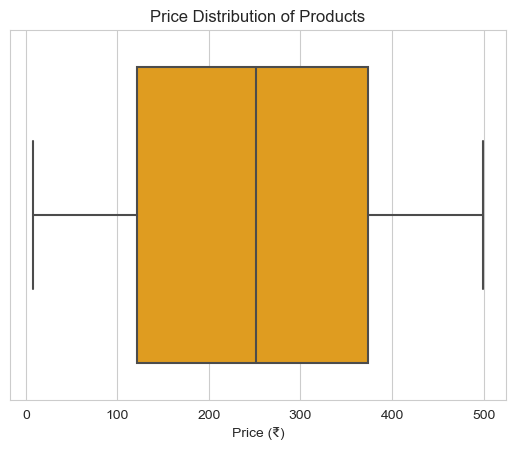

In [52]:
sns.boxplot(x=df['price'], color="orange")
plt.title("Price Distribution of Products")
plt.xlabel("Price (₹)")
plt.show()